In [17]:
import sys
import numpy as np
from os import listdir
from os.path import isfile, isdir, join
#from scipy.misc import imread
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import numpy.random as rng
#import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle 
import pandas as pd
import random

In [18]:
data_path = "./"


In [19]:
train_path = os.path.join(data_path, 'images_background')
New_xtrain = os.path.join (data_path, 'images') 
#validation_path = os.path.join(data_path, 'images_evaluation')

In [20]:

New_xtrain

'./images'

In [21]:
#def load_images_from_directory(path1):

#load alphabet separately and append that to tensor 
#This forloop will be usefull when training mult decision trees
alphabet_folder_list = [f for f in listdir(train_path) if isdir(join(train_path, f))]
alphabet_folder_list.sort()
alphabet_folder_list_test = [f1 for f1 in listdir(New_xtrain) if isdir(join(New_xtrain, f1))]

alphabet_folder_list_test.sort()
#print(alphabet_folder_list)
#print(alphabet_folder_list_test)
#Dictionary to store model perfomance score 
Dict_score = {keys: [] for keys in alphabet_folder_list_test}

#print("length of alphabet list", alphabet_folder_list)
for alphabet, alphabet_new in zip(alphabet_folder_list, alphabet_folder_list_test):
    Ytrain = []
    Xtrain = []
    X_new = []
    Y_new = []
    alph_list = []
    alph_list_new = []
    letter_class = []
    letter_class_new = []

    alphabet_path = os.path.join(train_path, alphabet)
    alphabet_path_new = os.path.join(New_xtrain, alphabet_new)
    print("alphabet_path train, alphabet_path_new", alphabet_path, alphabet_path_new)
    alph_list.append(alphabet_path)
    alph_list_new.append(alphabet_new)

    character_folder_list = [cf for cf in listdir(alphabet_path) if isdir(join(alphabet_path, cf))]
    character_folder_list.sort()
    print ("char folder list len", len(character_folder_list))
    
    character_folder_list_new = [cf1 for cf1 in listdir(alphabet_path_new) if isdir(join(alphabet_path_new, cf1))]
    character_folder_list_new.sort()
    print ("char folder test list len", len(character_folder_list_new))
    
    #each character in alphabet is in different folder (char0, char1, ...)
    category_labels = []
    category_labels_new = []
    F_name = []
    F_name_new = []
    
    #count = len(join(alphabet_path, char))
    for j,char in enumerate(character_folder_list):
        print("J and char is", j, char)
        character_folder_path = join(alphabet_path, char) 
        print("char folder path is", character_folder_path)
        count = len( listdir(character_folder_path))

        print ("counts is ", count)

        letter_class.append(char)
        catergory_images = []
        category_labels.append(np.repeat(j,count))

        if not isdir(character_folder_path):
            continue 

        #read every image in this directory (char0, char1, ...)

        image_list =  [ img for img in listdir(character_folder_path) if (isfile(join(character_folder_path,img)) and img[0] != '.')]

        for filename in image_list:
            F_name.append(filename)
            image_path = join(character_folder_path, filename)
            image = imread(image_path)

            #image preprocessing 
            image = image/255
            image = 1- image

            catergory_images.append(image)

        try:
            Xtrain.append(np.stack(catergory_images))

        #edgecase - last one 
        except ValueError as e:
            #print ("error - category_images:", catergory_images)
            print ("error - category_images:")

    Ytrain.append(np.stack(category_labels))
    Xtrain = np.stack(Xtrain)
    Ytrain = np.stack(Ytrain)
    new_Xtrain = Xtrain.reshape([Xtrain.shape[0]*Xtrain.shape[1], 105*105])
    new_ylabel = Ytrain.reshape(Ytrain[0].shape[0]*Ytrain[0].shape[1])
    print(new_Xtrain.shape)
    print(new_ylabel.shape)
    
    
    for jj,char2 in enumerate(character_folder_list_new):
        print("JJ is", jj, char2)
        character_folder_path_new = join(alphabet_path_new, char2) 
        print("char2 folder path is", character_folder_path_new)
        count_new = len( listdir(character_folder_path_new))


        letter_class_new.append(char2)
        catergory_images_new = []
        category_labels_new.append(np.repeat(jj,count_new))

        if not isdir(character_folder_path_new):
            continue 

        image_list_new =  [ img for img in listdir(character_folder_path_new) if (isfile(join(character_folder_path_new,img)) and img[0] != '.')]

        for filename_new in image_list_new:
            F_name_new.append(filename_new)
            image_path_new = join(character_folder_path_new, filename_new)
            image_new = imread(image_path_new)

            #image preprocessing 
            image_new = image_new/255
            image_new = 1- image_new

            catergory_images_new.append(image_new)

        try:
            X_new.append(np.stack(catergory_images_new))

        #edgecase - last one 
        except ValueError as e:
            #print ("error - category_images:", catergory_images)
            print ("error - category_images:")

    Y_new.append(np.stack(category_labels_new))
    X_new = np.stack(X_new)
    Y_new = np.stack(Y_new)
    new_X = X_new.reshape([X_new.shape[0]*X_new.shape[1], 105*105])
    new_Y = Y_new.reshape(Y_new[0].shape[0]*Y_new[0].shape[1])

    print(new_X.shape)
    print(new_Y.shape)


    #train_pct_index = int(0.2 * len(Xtrain))
    #X_train, X_test = Xtrain[:train_pct_index], Xtrain[train_pct_index:]
    #y_train, y_test = ytrain[:train_pct_index], ytrain[train_pct_index:]  

    #Randomized search parameter optimization
    
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    
    # First create the base model to tune
    rf = RandomForestClassifier()
    DC_model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, 
                                   verbose=2, random_state=42, n_jobs = -1)
    
    #grid = {"n_estimators":np.arange(10,100 , 20)
    #      ,"min_samples_leaf":np.arange(10, 50, 5)}

    #Randomized search parameter optimization 
    #DC_model = RandomizedSearchCV(RandomForestClassifier(random_state = 0, oob_score = 0)
    #                      ,param_distributions = grid
    #                      ,cv = 15, n_iter=20
    #                      ,n_jobs=-1, random_state = 0)
    DC_model.fit(new_Xtrain, new_ylabel)
     
    
    y_pred =  DC_model.predict(new_X)
    #save the model to disk
    #filename_save = alphabet_new +'.sav'
    #pickle.dump(DC_model, open(filename_save, 'wb'))


    classes_new = np.array(letter_class_new)
    score2 = accuracy_score(y_pred, new_Y)
    #error 
    print ("score is", score2)
    
    
    Dict_score[alphabet_new].append(score2)


    L = len(np.where(new_Y != y_pred)[0]) 

    print("############################ len of predicted is ####################", L)
    
    
    #Alpha_name = listdir(train_path)
    F_name_new = np.array(F_name_new)
    
    #size = np.arange(0, len(F_name))

    #difference = np.setdiff1d(size, rotated_only)

    #reduced_original = F_name[difference]

    #new_y_pred = y_pred[difference]

    print("New classes", classes_new[y_pred])

    #creat dictionary with index image per class
    Dictionary_idx = {keys: [] for keys in classes_new}


    for i,j in Dictionary_idx.items():
        #print (i)
        Dictionary_idx[i].append(np.where(classes_new[y_pred] == i))


    #convert and save images into different classes from y_pred
    Dict_nimages = {keys: [] for keys in classes_new}

    for i,j in Dict_nimages.items():
        Dict_nimages[i].append(np.shape(np.where(classes_new[y_pred] == i))[1])
    print("Dict_nimages", Dict_nimages)


    for j,k in Dict_nimages.items():
        #print("k is", k)
        kk =  str(j)
        rot_character_path = join(character_folder_path, kk)

        if not os.path.exists(rot_character_path):
            os.makedirs(rot_character_path)

        #print("Here is char path", char_path)
        ggg = []
        for im in range(k[0]):
            ggg.append(im)
        new_ggg = random.sample(ggg,10)
        for im in new_ggg:
            im_arr = new_X[np.ravel(Dictionary_idx[j])[im]].reshape(105,105)
            im_arr = im_arr.astype(np.uint8)
            
            im_arr = 255 + im_arr
            arr_im = Image.fromarray(im_arr)
        
            arr_im.save(join(character_folder_path, kk,F_name_new[im]))
            
dataframe = pd.DataFrame(Dict_score)
dataframe.to_csv("Accuracy_omniglot.csv")

alphabet_path train, alphabet_path_new ./images_background/Alphabet_of_the_Magi ./images/Alphabet_of_the_Magi
char folder list len 20
char folder test list len 20
J and char is 0 character01
char folder path is ./images_background/Alphabet_of_the_Magi/character01
counts is  160
J and char is 1 character02
char folder path is ./images_background/Alphabet_of_the_Magi/character02
counts is  160
J and char is 2 character03
char folder path is ./images_background/Alphabet_of_the_Magi/character03
counts is  160
J and char is 3 character04
char folder path is ./images_background/Alphabet_of_the_Magi/character04
counts is  160
J and char is 4 character05
char folder path is ./images_background/Alphabet_of_the_Magi/character05
counts is  160
J and char is 5 character06
char folder path is ./images_background/Alphabet_of_the_Magi/character06
counts is  160
J and char is 6 character07
char folder path is ./images_background/Alphabet_of_the_Magi/character07
counts is  160
J and char is 7 character

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 34.5min finished


score is 0.91625
############################ len of predicted is #################### 134
New classes ['character01' 'character01' 'character01' ... 'character20' 'character20'
 'character20']
Dict_nimages {'character01': [100], 'character02': [81], 'character03': [80], 'character04': [81], 'character05': [81], 'character06': [74], 'character07': [81], 'character08': [74], 'character09': [62], 'character10': [139], 'character11': [74], 'character12': [75], 'character13': [80], 'character14': [71], 'character15': [73], 'character16': [66], 'character17': [77], 'character18': [75], 'character19': [93], 'character20': [63]}
alphabet_path train, alphabet_path_new ./images_background/Anglo-Saxon_Futhorc ./images/Anglo-Saxon_Futhorc
char folder list len 29
char folder test list len 29
J and char is 0 character01
char folder path is ./images_background/Anglo-Saxon_Futhorc/character01
counts is  160
J and char is 1 character02
char folder path is ./images_background/Anglo-Saxon_Futhorc/charac

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 51.5min finished
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.9025862068965518
############################ len of predicted is #################### 226
New classes ['character01' 'character01' 'character01' ... 'character29' 'character29'
 'character29']
Dict_nimages {'character01': [68], 'character02': [91], 'character03': [94], 'character04': [76], 'character05': [73], 'character06': [90], 'character07': [68], 'character08': [82], 'character09': [80], 'character10': [83], 'character11': [111], 'character12': [80], 'character13': [53], 'character14': [101], 'character15': [74], 'character16': [81], 'character17': [66], 'character18': [79], 'character19': [72], 'character20': [68], 'character21': [90], 'character22': [77], 'character23': [80], 'character24': [84], 'character25': [69], 'character26': [83], 'character27': [72], 'character28': [90], 'character29': [85]}
alphabet_path train, alphabet_path_new ./images_background/Arcadian ./images/Arcadian
char folder list len 26
char folder test list len 26
J and char is 0 character01
cha

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 50.6min finished
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.9264423076923077
############################ len of predicted is #################### 153
New classes ['character01' 'character01' 'character01' ... 'character26' 'character26'
 'character26']
Dict_nimages {'character01': [78], 'character02': [82], 'character03': [100], 'character04': [80], 'character05': [75], 'character06': [84], 'character07': [71], 'character08': [72], 'character09': [77], 'character10': [80], 'character11': [78], 'character12': [74], 'character13': [80], 'character14': [76], 'character15': [124], 'character16': [77], 'character17': [79], 'character18': [83], 'character19': [68], 'character20': [77], 'character21': [82], 'character22': [77], 'character23': [71], 'character24': [79], 'character25': [79], 'character26': [77]}
alphabet_path train, alphabet_path_new ./images_background/Armenian ./images/Armenian
char folder list len 41
char folder test list len 41
J and char is 0 character01
char folder path is ./images_background/Armenian/character01
count

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 94.4min finished


score is 0.85
############################ len of predicted is #################### 492
New classes ['character01' 'character01' 'character01' ... 'character29' 'character41'
 'character41']
Dict_nimages {'character01': [83], 'character02': [72], 'character03': [74], 'character04': [71], 'character05': [67], 'character06': [71], 'character07': [64], 'character08': [64], 'character09': [77], 'character10': [70], 'character11': [69], 'character12': [106], 'character13': [76], 'character14': [71], 'character15': [83], 'character16': [76], 'character17': [80], 'character18': [71], 'character19': [79], 'character20': [69], 'character21': [86], 'character22': [52], 'character23': [85], 'character24': [91], 'character25': [74], 'character26': [76], 'character27': [73], 'character28': [90], 'character29': [96], 'character30': [69], 'character31': [82], 'character32': [87], 'character33': [69], 'character34': [102], 'character35': [75], 'character36': [82], 'character37': [130], 'character38': 

JJ is 30 character31
char2 folder path is ./images/Asomtavruli_(Georgian)/character31
JJ is 31 character32
char2 folder path is ./images/Asomtavruli_(Georgian)/character32
JJ is 32 character33
char2 folder path is ./images/Asomtavruli_(Georgian)/character33
JJ is 33 character34
char2 folder path is ./images/Asomtavruli_(Georgian)/character34
JJ is 34 character35
char2 folder path is ./images/Asomtavruli_(Georgian)/character35
JJ is 35 character36
char2 folder path is ./images/Asomtavruli_(Georgian)/character36
JJ is 36 character37
char2 folder path is ./images/Asomtavruli_(Georgian)/character37
JJ is 37 character38
char2 folder path is ./images/Asomtavruli_(Georgian)/character38
JJ is 38 character39
char2 folder path is ./images/Asomtavruli_(Georgian)/character39
JJ is 39 character40
char2 folder path is ./images/Asomtavruli_(Georgian)/character40
(3200, 11025)
(3200,)
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 102.7min finished


score is 0.7640625
############################ len of predicted is #################### 755
New classes ['character20' 'character01' 'character01' ... 'character40' 'character40'
 'character40']
Dict_nimages {'character01': [91], 'character02': [73], 'character03': [83], 'character04': [63], 'character05': [73], 'character06': [88], 'character07': [62], 'character08': [85], 'character09': [65], 'character10': [111], 'character11': [104], 'character12': [60], 'character13': [60], 'character14': [71], 'character15': [106], 'character16': [69], 'character17': [90], 'character18': [65], 'character19': [70], 'character20': [82], 'character21': [75], 'character22': [95], 'character23': [51], 'character24': [103], 'character25': [95], 'character26': [77], 'character27': [71], 'character28': [88], 'character29': [70], 'character30': [72], 'character31': [63], 'character32': [83], 'character33': [88], 'character34': [76], 'character35': [92], 'character36': [77], 'character37': [73], 'characte

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 41.6min finished


score is 0.8463541666666666
############################ len of predicted is #################### 295
New classes ['character02' 'character01' 'character01' ... 'character11' 'character24'
 'character24']
Dict_nimages {'character01': [64], 'character02': [149], 'character03': [80], 'character04': [79], 'character05': [95], 'character06': [67], 'character07': [80], 'character08': [81], 'character09': [64], 'character10': [57], 'character11': [69], 'character12': [68], 'character13': [77], 'character14': [81], 'character15': [127], 'character16': [65], 'character17': [78], 'character18': [81], 'character19': [68], 'character20': [74], 'character21': [70], 'character22': [84], 'character23': [82], 'character24': [80]}
alphabet_path train, alphabet_path_new ./images_background/Bengali ./images/Bengali
char folder list len 46
char folder test list len 46
J and char is 0 character01
char folder path is ./images_background/Bengali/character01
counts is  160
J and char is 1 character02
char fo

JJ is 39 character40
char2 folder path is ./images/Bengali/character40
JJ is 40 character41
char2 folder path is ./images/Bengali/character41
JJ is 41 character42
char2 folder path is ./images/Bengali/character42
JJ is 42 character43
char2 folder path is ./images/Bengali/character43
JJ is 43 character44
char2 folder path is ./images/Bengali/character44
JJ is 44 character45
char2 folder path is ./images/Bengali/character45
JJ is 45 character46
char2 folder path is ./images/Bengali/character46
(3680, 11025)
(3680,)
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 104.5min finished


score is 0.9342391304347826
############################ len of predicted is #################### 242
New classes ['character01' 'character08' 'character01' ... 'character46' 'character46'
 'character46']
Dict_nimages {'character01': [74], 'character02': [78], 'character03': [86], 'character04': [75], 'character05': [70], 'character06': [73], 'character07': [80], 'character08': [149], 'character09': [77], 'character10': [91], 'character11': [80], 'character12': [82], 'character13': [81], 'character14': [78], 'character15': [82], 'character16': [80], 'character17': [78], 'character18': [79], 'character19': [66], 'character20': [78], 'character21': [86], 'character22': [75], 'character23': [82], 'character24': [66], 'character25': [82], 'character26': [84], 'character27': [79], 'character28': [78], 'character29': [79], 'character30': [92], 'character31': [80], 'character32': [78], 'character33': [75], 'character34': [84], 'character35': [70], 'character36': [79], 'character37': [77], 'ch

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 24.3min finished


score is 0.8741071428571429
############################ len of predicted is #################### 141
New classes ['character01' 'character01' 'character01' ... 'character14' 'character14'
 'character14']
Dict_nimages {'character01': [88], 'character02': [65], 'character03': [81], 'character04': [120], 'character05': [69], 'character06': [80], 'character07': [79], 'character08': [65], 'character09': [83], 'character10': [84], 'character11': [71], 'character12': [86], 'character13': [78], 'character14': [71]}
alphabet_path train, alphabet_path_new ./images_background/Braille ./images/Braille
char folder list len 26
char folder test list len 26
J and char is 0 character01
char folder path is ./images_background/Braille/character01
counts is  160
J and char is 1 character02
char folder path is ./images_background/Braille/character02
counts is  160
J and char is 2 character03
char folder path is ./images_background/Braille/character03
counts is  160
J and char is 3 character04
char folder 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 105.9min finished


score is 0.5153846153846153
############################ len of predicted is #################### 1008
New classes ['character01' 'character01' 'character01' ... 'character05' 'character06'
 'character26']
Dict_nimages {'character01': [148], 'character02': [62], 'character03': [98], 'character04': [74], 'character05': [148], 'character06': [93], 'character07': [52], 'character08': [79], 'character09': [175], 'character10': [68], 'character11': [203], 'character12': [43], 'character13': [66], 'character14': [79], 'character15': [63], 'character16': [64], 'character17': [34], 'character18': [51], 'character19': [98], 'character20': [93], 'character21': [51], 'character22': [64], 'character23': [62], 'character24': [35], 'character25': [29], 'character26': [48]}
alphabet_path train, alphabet_path_new ./images_background/Burmese_(Myanmar) ./images/Burmese_(Myanmar)
char folder list len 34
char folder test list len 34
J and char is 0 character01
char folder path is ./images_background/Burme

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 77.0min finished


score is 0.8988970588235294
############################ len of predicted is #################### 275
New classes ['character01' 'character01' 'character11' ... 'character34' 'character34'
 'character34']
Dict_nimages {'character01': [70], 'character02': [70], 'character03': [105], 'character04': [69], 'character05': [84], 'character06': [63], 'character07': [77], 'character08': [78], 'character09': [79], 'character10': [87], 'character11': [102], 'character12': [77], 'character13': [79], 'character14': [80], 'character15': [95], 'character16': [74], 'character17': [87], 'character18': [77], 'character19': [72], 'character20': [71], 'character21': [75], 'character22': [107], 'character23': [77], 'character24': [68], 'character25': [77], 'character26': [78], 'character27': [88], 'character28': [76], 'character29': [84], 'character30': [92], 'character31': [74], 'character32': [75], 'character33': [78], 'character34': [75]}
alphabet_path train, alphabet_path_new ./images_background/Cyril

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 60.6min finished
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.9015151515151515
############################ len of predicted is #################### 260
New classes ['character01' 'character01' 'character01' ... 'character33' 'character33'
 'character33']
Dict_nimages {'character01': [79], 'character02': [69], 'character03': [69], 'character04': [84], 'character05': [75], 'character06': [80], 'character07': [63], 'character08': [82], 'character09': [74], 'character10': [83], 'character11': [76], 'character12': [80], 'character13': [93], 'character14': [76], 'character15': [77], 'character16': [112], 'character17': [101], 'character18': [93], 'character19': [107], 'character20': [88], 'character21': [83], 'character22': [77], 'character23': [80], 'character24': [49], 'character25': [80], 'character26': [89], 'character27': [70], 'character28': [73], 'character29': [72], 'character30': [74], 'character31': [84], 'character32': [77], 'character33': [71]}
alphabet_path train, alphabet_path_new ./images_background/Early_Aramaic ./images/Ear

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 35.9min finished


score is 0.95
############################ len of predicted is #################### 88
New classes ['character01' 'character01' 'character01' ... 'character22' 'character22'
 'character22']
Dict_nimages {'character01': [82], 'character02': [76], 'character03': [72], 'character04': [72], 'character05': [70], 'character06': [81], 'character07': [79], 'character08': [82], 'character09': [81], 'character10': [78], 'character11': [76], 'character12': [109], 'character13': [79], 'character14': [78], 'character15': [79], 'character16': [83], 'character17': [79], 'character18': [91], 'character19': [76], 'character20': [77], 'character21': [80], 'character22': [80]}
alphabet_path train, alphabet_path_new ./images_background/Futurama ./images/Futurama
char folder list len 26
char folder test list len 26
J and char is 0 character01
char folder path is ./images_background/Futurama/character01
counts is  160
J and char is 1 character02
char folder path is ./images_background/Futurama/character02
c

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.6min
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 45.7min finished


score is 0.9644230769230769
############################ len of predicted is #################### 74
New classes ['character01' 'character01' 'character01' ... 'character26' 'character26'
 'character26']
Dict_nimages {'character01': [87], 'character02': [78], 'character03': [79], 'character04': [91], 'character05': [80], 'character06': [71], 'character07': [82], 'character08': [75], 'character09': [72], 'character10': [81], 'character11': [79], 'character12': [74], 'character13': [78], 'character14': [106], 'character15': [76], 'character16': [79], 'character17': [80], 'character18': [80], 'character19': [80], 'character20': [80], 'character21': [80], 'character22': [89], 'character23': [77], 'character24': [79], 'character25': [76], 'character26': [71]}
alphabet_path train, alphabet_path_new ./images_background/Grantha ./images/Grantha
char folder list len 43
char folder test list len 43
J and char is 0 character01
char folder path is ./images_background/Grantha/character01
counts is 

(3440, 11025)
(3440,)
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 98.4min finished


score is 0.9825581395348837
############################ len of predicted is #################### 60
New classes ['character01' 'character01' 'character01' ... 'character43' 'character43'
 'character43']
Dict_nimages {'character01': [81], 'character02': [80], 'character03': [79], 'character04': [81], 'character05': [76], 'character06': [79], 'character07': [80], 'character08': [80], 'character09': [84], 'character10': [71], 'character11': [80], 'character12': [85], 'character13': [80], 'character14': [80], 'character15': [79], 'character16': [76], 'character17': [80], 'character18': [80], 'character19': [77], 'character20': [81], 'character21': [77], 'character22': [80], 'character23': [86], 'character24': [82], 'character25': [79], 'character26': [81], 'character27': [83], 'character28': [80], 'character29': [78], 'character30': [78], 'character31': [79], 'character32': [74], 'character33': [88], 'character34': [80], 'character35': [80], 'character36': [81], 'character37': [82], 'char

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 42.0min finished


score is 0.896875
############################ len of predicted is #################### 198
New classes ['character01' 'character01' 'character01' ... 'character24' 'character24'
 'character24']
Dict_nimages {'character01': [77], 'character02': [61], 'character03': [85], 'character04': [77], 'character05': [67], 'character06': [91], 'character07': [69], 'character08': [84], 'character09': [88], 'character10': [79], 'character11': [72], 'character12': [76], 'character13': [85], 'character14': [79], 'character15': [154], 'character16': [86], 'character17': [67], 'character18': [58], 'character19': [83], 'character20': [82], 'character21': [80], 'character22': [77], 'character23': [67], 'character24': [76]}
alphabet_path train, alphabet_path_new ./images_background/Gujarati ./images/Gujarati
char folder list len 48
char folder test list len 48
J and char is 0 character01
char folder path is ./images_background/Gujarati/character01
counts is  160
J and char is 1 character02
char folder pat

JJ is 37 character38
char2 folder path is ./images/Gujarati/character38
JJ is 38 character39
char2 folder path is ./images/Gujarati/character39
JJ is 39 character40
char2 folder path is ./images/Gujarati/character40
JJ is 40 character41
char2 folder path is ./images/Gujarati/character41
JJ is 41 character42
char2 folder path is ./images/Gujarati/character42
JJ is 42 character43
char2 folder path is ./images/Gujarati/character43
JJ is 43 character44
char2 folder path is ./images/Gujarati/character44
JJ is 44 character45
char2 folder path is ./images/Gujarati/character45
JJ is 45 character46
char2 folder path is ./images/Gujarati/character46
JJ is 46 character47
char2 folder path is ./images/Gujarati/character47
JJ is 47 character48
char2 folder path is ./images/Gujarati/character48
(3840, 11025)
(3840,)
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 114.7min finished


score is 0.9091145833333333
############################ len of predicted is #################### 349
New classes ['character01' 'character37' 'character01' ... 'character48' 'character48'
 'character48']
Dict_nimages {'character01': [80], 'character02': [80], 'character03': [79], 'character04': [84], 'character05': [68], 'character06': [72], 'character07': [80], 'character08': [72], 'character09': [92], 'character10': [71], 'character11': [61], 'character12': [83], 'character13': [77], 'character14': [73], 'character15': [80], 'character16': [81], 'character17': [74], 'character18': [82], 'character19': [74], 'character20': [73], 'character21': [170], 'character22': [77], 'character23': [74], 'character24': [82], 'character25': [99], 'character26': [80], 'character27': [89], 'character28': [77], 'character29': [79], 'character30': [85], 'character31': [72], 'character32': [80], 'character33': [65], 'character34': [81], 'character35': [78], 'character36': [78], 'character37': [86], 'ch

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 39.7min finished
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.7829545454545455
############################ len of predicted is #################### 382
New classes ['character01' 'character01' 'character01' ... 'character22' 'character09'
 'character08']
Dict_nimages {'character01': [78], 'character02': [48], 'character03': [77], 'character04': [74], 'character05': [71], 'character06': [69], 'character07': [79], 'character08': [73], 'character09': [78], 'character10': [83], 'character11': [109], 'character12': [66], 'character13': [70], 'character14': [91], 'character15': [111], 'character16': [76], 'character17': [72], 'character18': [73], 'character19': [62], 'character20': [151], 'character21': [87], 'character22': [62]}
alphabet_path train, alphabet_path_new ./images_background/Inuktitut_(Canadian_Aboriginal_Syllabics) ./images/Inuktitut_(Canadian_Aboriginal_Syllabics)
char folder list len 16
char folder test list len 16
J and char is 0 character01
char folder path is ./images_background/Inuktitut_(Canadian_Aboriginal_Syllabics)/c

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 25.2min finished


score is 0.90390625
############################ len of predicted is #################### 123
New classes ['character01' 'character01' 'character01' ... 'character16' 'character16'
 'character16']
Dict_nimages {'character01': [74], 'character02': [70], 'character03': [96], 'character04': [82], 'character05': [98], 'character06': [76], 'character07': [76], 'character08': [80], 'character09': [69], 'character10': [79], 'character11': [78], 'character12': [76], 'character13': [80], 'character14': [81], 'character15': [84], 'character16': [81]}
alphabet_path train, alphabet_path_new ./images_background/Japanese_(hiragana) ./images/Japanese_(hiragana)
char folder list len 52
char folder test list len 52
J and char is 0 character01
char folder path is ./images_background/Japanese_(hiragana)/character01
counts is  160
J and char is 1 character02
char folder path is ./images_background/Japanese_(hiragana)/character02
counts is  160
J and char is 2 character03
char folder path is ./images_backg

JJ is 23 character24
char2 folder path is ./images/Japanese_(hiragana)/character24
JJ is 24 character25
char2 folder path is ./images/Japanese_(hiragana)/character25
JJ is 25 character26
char2 folder path is ./images/Japanese_(hiragana)/character26
JJ is 26 character27
char2 folder path is ./images/Japanese_(hiragana)/character27
JJ is 27 character28
char2 folder path is ./images/Japanese_(hiragana)/character28
JJ is 28 character29
char2 folder path is ./images/Japanese_(hiragana)/character29
JJ is 29 character30
char2 folder path is ./images/Japanese_(hiragana)/character30
JJ is 30 character31
char2 folder path is ./images/Japanese_(hiragana)/character31
JJ is 31 character32
char2 folder path is ./images/Japanese_(hiragana)/character32
JJ is 32 character33
char2 folder path is ./images/Japanese_(hiragana)/character33
JJ is 33 character34
char2 folder path is ./images/Japanese_(hiragana)/character34
JJ is 34 character35
char2 folder path is ./images/Japanese_(hiragana)/character35
JJ i

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 118.4min finished


score is 0.895673076923077
############################ len of predicted is #################### 434
New classes ['character01' 'character01' 'character01' ... 'character52' 'character52'
 'character52']
Dict_nimages {'character01': [72], 'character02': [103], 'character03': [66], 'character04': [78], 'character05': [71], 'character06': [67], 'character07': [77], 'character08': [94], 'character09': [62], 'character10': [131], 'character11': [75], 'character12': [118], 'character13': [85], 'character14': [76], 'character15': [79], 'character16': [79], 'character17': [72], 'character18': [134], 'character19': [68], 'character20': [60], 'character21': [68], 'character22': [83], 'character23': [78], 'character24': [78], 'character25': [67], 'character26': [71], 'character27': [79], 'character28': [74], 'character29': [74], 'character30': [71], 'character31': [79], 'character32': [77], 'character33': [98], 'character34': [73], 'character35': [80], 'character36': [74], 'character37': [62], '

JJ is 21 character22
char2 folder path is ./images/Japanese_(katakana)/character22
JJ is 22 character23
char2 folder path is ./images/Japanese_(katakana)/character23
JJ is 23 character24
char2 folder path is ./images/Japanese_(katakana)/character24
JJ is 24 character25
char2 folder path is ./images/Japanese_(katakana)/character25
JJ is 25 character26
char2 folder path is ./images/Japanese_(katakana)/character26
JJ is 26 character27
char2 folder path is ./images/Japanese_(katakana)/character27
JJ is 27 character28
char2 folder path is ./images/Japanese_(katakana)/character28
JJ is 28 character29
char2 folder path is ./images/Japanese_(katakana)/character29
JJ is 29 character30
char2 folder path is ./images/Japanese_(katakana)/character30
JJ is 30 character31
char2 folder path is ./images/Japanese_(katakana)/character31
JJ is 31 character32
char2 folder path is ./images/Japanese_(katakana)/character32
JJ is 32 character33
char2 folder path is ./images/Japanese_(katakana)/character33
JJ i

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 106.2min finished


score is 0.8696808510638298
############################ len of predicted is #################### 490
New classes ['character01' 'character01' 'character41' ... 'character47' 'character47'
 'character47']
Dict_nimages {'character01': [69], 'character02': [83], 'character03': [98], 'character04': [79], 'character05': [81], 'character06': [77], 'character07': [84], 'character08': [64], 'character09': [122], 'character10': [75], 'character11': [71], 'character12': [77], 'character13': [74], 'character14': [79], 'character15': [81], 'character16': [80], 'character17': [70], 'character18': [68], 'character19': [83], 'character20': [68], 'character21': [66], 'character22': [72], 'character23': [79], 'character24': [119], 'character25': [137], 'character26': [83], 'character27': [90], 'character28': [81], 'character29': [78], 'character30': [75], 'character31': [81], 'character32': [68], 'character33': [79], 'character34': [84], 'character35': [80], 'character36': [70], 'character37': [76], '

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 84.0min finished


score is 0.835
############################ len of predicted is #################### 528
New classes ['character01' 'character01' 'character01' ... 'character40' 'character40'
 'character40']
Dict_nimages {'character01': [79], 'character02': [71], 'character03': [81], 'character04': [71], 'character05': [104], 'character06': [60], 'character07': [78], 'character08': [59], 'character09': [91], 'character10': [68], 'character11': [71], 'character12': [76], 'character13': [71], 'character14': [67], 'character15': [80], 'character16': [69], 'character17': [62], 'character18': [110], 'character19': [94], 'character20': [77], 'character21': [80], 'character22': [102], 'character23': [73], 'character24': [93], 'character25': [91], 'character26': [67], 'character27': [66], 'character28': [95], 'character29': [74], 'character30': [87], 'character31': [87], 'character32': [79], 'character33': [123], 'character34': [77], 'character35': [79], 'character36': [81], 'character37': [69], 'character38'

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 46.6min finished
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


score is 0.8673076923076923
############################ len of predicted is #################### 276
New classes ['character01' 'character01' 'character01' ... 'character26' 'character26'
 'character26']
Dict_nimages {'character01': [65], 'character02': [73], 'character03': [114], 'character04': [72], 'character05': [71], 'character06': [77], 'character07': [69], 'character08': [75], 'character09': [115], 'character10': [68], 'character11': [76], 'character12': [58], 'character13': [74], 'character14': [91], 'character15': [106], 'character16': [66], 'character17': [73], 'character18': [106], 'character19': [76], 'character20': [70], 'character21': [97], 'character22': [76], 'character23': [70], 'character24': [81], 'character25': [81], 'character26': [80]}
alphabet_path train, alphabet_path_new ./images_background/Malay_(Jawi_-_Arabic) ./images/Malay_(Jawi_-_Arabic)
char folder list len 40
char folder test list len 40
J and char is 0 character01
char folder path is ./images_backgroun

JJ is 32 character33
char2 folder path is ./images/Malay_(Jawi_-_Arabic)/character33
JJ is 33 character34
char2 folder path is ./images/Malay_(Jawi_-_Arabic)/character34
JJ is 34 character35
char2 folder path is ./images/Malay_(Jawi_-_Arabic)/character35
JJ is 35 character36
char2 folder path is ./images/Malay_(Jawi_-_Arabic)/character36
JJ is 36 character37
char2 folder path is ./images/Malay_(Jawi_-_Arabic)/character37
JJ is 37 character38
char2 folder path is ./images/Malay_(Jawi_-_Arabic)/character38
JJ is 38 character39
char2 folder path is ./images/Malay_(Jawi_-_Arabic)/character39
JJ is 39 character40
char2 folder path is ./images/Malay_(Jawi_-_Arabic)/character40
(3200, 11025)
(3200,)
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 96.1min finished


score is 0.794375
############################ len of predicted is #################### 658
New classes ['character01' 'character01' 'character01' ... 'character40' 'character03'
 'character40']
Dict_nimages {'character01': [135], 'character02': [93], 'character03': [79], 'character04': [75], 'character05': [58], 'character06': [79], 'character07': [98], 'character08': [69], 'character09': [65], 'character10': [87], 'character11': [76], 'character12': [123], 'character13': [62], 'character14': [59], 'character15': [79], 'character16': [55], 'character17': [100], 'character18': [81], 'character19': [83], 'character20': [76], 'character21': [71], 'character22': [73], 'character23': [86], 'character24': [91], 'character25': [72], 'character26': [66], 'character27': [60], 'character28': [88], 'character29': [69], 'character30': [102], 'character31': [72], 'character32': [70], 'character33': [82], 'character34': [60], 'character35': [110], 'character36': [85], 'character37': [89], 'characte

JJ is 30 character31
char2 folder path is ./images/Mkhedruli_(Georgian)/character31
JJ is 31 character32
char2 folder path is ./images/Mkhedruli_(Georgian)/character32
JJ is 32 character33
char2 folder path is ./images/Mkhedruli_(Georgian)/character33
JJ is 33 character34
char2 folder path is ./images/Mkhedruli_(Georgian)/character34
JJ is 34 character35
char2 folder path is ./images/Mkhedruli_(Georgian)/character35
JJ is 35 character36
char2 folder path is ./images/Mkhedruli_(Georgian)/character36
JJ is 36 character37
char2 folder path is ./images/Mkhedruli_(Georgian)/character37
JJ is 37 character38
char2 folder path is ./images/Mkhedruli_(Georgian)/character38
JJ is 38 character39
char2 folder path is ./images/Mkhedruli_(Georgian)/character39
JJ is 39 character40
char2 folder path is ./images/Mkhedruli_(Georgian)/character40
JJ is 40 character41
char2 folder path is ./images/Mkhedruli_(Georgian)/character41
(3280, 11025)
(3280,)
Fitting 3 folds for each of 50 candidates, totalling 1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 90.8min finished


score is 0.9079268292682927
############################ len of predicted is #################### 302
New classes ['character01' 'character01' 'character05' ... 'character41' 'character41'
 'character41']
Dict_nimages {'character01': [72], 'character02': [78], 'character03': [72], 'character04': [77], 'character05': [119], 'character06': [81], 'character07': [81], 'character08': [70], 'character09': [82], 'character10': [107], 'character11': [75], 'character12': [81], 'character13': [76], 'character14': [73], 'character15': [75], 'character16': [76], 'character17': [73], 'character18': [62], 'character19': [82], 'character20': [81], 'character21': [61], 'character22': [87], 'character23': [164], 'character24': [76], 'character25': [77], 'character26': [70], 'character27': [80], 'character28': [74], 'character29': [79], 'character30': [71], 'character31': [74], 'character32': [70], 'character33': [81], 'character34': [76], 'character35': [79], 'character36': [82], 'character37': [78], '

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 68.6min finished


score is 0.8401515151515152
############################ len of predicted is #################### 422
New classes ['character01' 'character01' 'character01' ... 'character32' 'character33'
 'character33']
Dict_nimages {'character01': [106], 'character02': [117], 'character03': [80], 'character04': [67], 'character05': [67], 'character06': [92], 'character07': [85], 'character08': [86], 'character09': [68], 'character10': [84], 'character11': [83], 'character12': [77], 'character13': [79], 'character14': [63], 'character15': [69], 'character16': [72], 'character17': [70], 'character18': [78], 'character19': [78], 'character20': [64], 'character21': [79], 'character22': [69], 'character23': [74], 'character24': [67], 'character25': [76], 'character26': [122], 'character27': [77], 'character28': [72], 'character29': [69], 'character30': [77], 'character31': [87], 'character32': [113], 'character33': [73]}
alphabet_path train, alphabet_path_new ./images_background/Ojibwe_(Canadian_Aborigin

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 23.1min finished


score is 0.9026785714285714
############################ len of predicted is #################### 109
New classes ['character01' 'character01' 'character01' ... 'character14' 'character14'
 'character14']
Dict_nimages {'character01': [77], 'character02': [72], 'character03': [87], 'character04': [77], 'character05': [74], 'character06': [94], 'character07': [99], 'character08': [69], 'character09': [73], 'character10': [81], 'character11': [77], 'character12': [78], 'character13': [86], 'character14': [76]}
alphabet_path train, alphabet_path_new ./images_background/Sanskrit ./images/Sanskrit
char folder list len 42
char folder test list len 42
J and char is 0 character01
char folder path is ./images_background/Sanskrit/character01
counts is  160
J and char is 1 character02
char folder path is ./images_background/Sanskrit/character02
counts is  160
J and char is 2 character03
char folder path is ./images_background/Sanskrit/character03
counts is  160
J and char is 3 character04
char fol

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 83.8min finished


score is 0.9526785714285714
############################ len of predicted is #################### 159
New classes ['character01' 'character01' 'character01' ... 'character42' 'character42'
 'character42']
Dict_nimages {'character01': [81], 'character02': [78], 'character03': [84], 'character04': [87], 'character05': [71], 'character06': [88], 'character07': [80], 'character08': [75], 'character09': [72], 'character10': [79], 'character11': [132], 'character12': [78], 'character13': [77], 'character14': [79], 'character15': [78], 'character16': [77], 'character17': [81], 'character18': [69], 'character19': [81], 'character20': [90], 'character21': [73], 'character22': [77], 'character23': [80], 'character24': [79], 'character25': [73], 'character26': [86], 'character27': [78], 'character28': [79], 'character29': [83], 'character30': [80], 'character31': [80], 'character32': [79], 'character33': [75], 'character34': [78], 'character35': [75], 'character36': [83], 'character37': [83], 'ch

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 39.2min finished


score is 0.9380434782608695
############################ len of predicted is #################### 114
New classes ['character01' 'character01' 'character01' ... 'character23' 'character23'
 'character23']
Dict_nimages {'character01': [75], 'character02': [76], 'character03': [74], 'character04': [63], 'character05': [75], 'character06': [79], 'character07': [107], 'character08': [75], 'character09': [80], 'character10': [74], 'character11': [81], 'character12': [109], 'character13': [76], 'character14': [77], 'character15': [84], 'character16': [72], 'character17': [81], 'character18': [78], 'character19': [90], 'character20': [77], 'character21': [81], 'character22': [78], 'character23': [78]}
alphabet_path train, alphabet_path_new ./images_background/Tagalog ./images/Tagalog
char folder list len 17
char folder test list len 17
J and char is 0 character01
char folder path is ./images_background/Tagalog/character01
counts is  160
J and char is 1 character02
char folder path is ./images

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.1min
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 27.0min finished


score is 0.9088235294117647
############################ len of predicted is #################### 124
New classes ['character01' 'character01' 'character01' ... 'character17' 'character17'
 'character08']
Dict_nimages {'character01': [73], 'character02': [77], 'character03': [73], 'character04': [108], 'character05': [78], 'character06': [73], 'character07': [76], 'character08': [97], 'character09': [76], 'character10': [80], 'character11': [78], 'character12': [73], 'character13': [74], 'character14': [76], 'character15': [99], 'character16': [87], 'character17': [62]}
alphabet_path train, alphabet_path_new ./images_background/Tifinagh ./images/Tifinagh
char folder list len 55
char folder test list len 55
J and char is 0 character01
char folder path is ./images_background/Tifinagh/character01
counts is  160
J and char is 1 character02
char folder path is ./images_background/Tifinagh/character02
counts is  160
J and char is 2 character03
char folder path is ./images_background/Tifinagh

JJ is 27 character28
char2 folder path is ./images/Tifinagh/character28
JJ is 28 character29
char2 folder path is ./images/Tifinagh/character29
JJ is 29 character30
char2 folder path is ./images/Tifinagh/character30
JJ is 30 character31
char2 folder path is ./images/Tifinagh/character31
JJ is 31 character32
char2 folder path is ./images/Tifinagh/character32
JJ is 32 character33
char2 folder path is ./images/Tifinagh/character33
JJ is 33 character34
char2 folder path is ./images/Tifinagh/character34
JJ is 34 character35
char2 folder path is ./images/Tifinagh/character35
JJ is 35 character36
char2 folder path is ./images/Tifinagh/character36
JJ is 36 character37
char2 folder path is ./images/Tifinagh/character37
JJ is 37 character38
char2 folder path is ./images/Tifinagh/character38
JJ is 38 character39
char2 folder path is ./images/Tifinagh/character39
JJ is 39 character40
char2 folder path is ./images/Tifinagh/character40
JJ is 40 character41
char2 folder path is ./images/Tifinagh/char

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/home/zithubai/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 119.1min finished


score is 0.8436363636363636
############################ len of predicted is #################### 688
New classes ['character01' 'character01' 'character01' ... 'character55' 'character55'
 'character55']
Dict_nimages {'character01': [76], 'character02': [66], 'character03': [78], 'character04': [76], 'character05': [79], 'character06': [77], 'character07': [41], 'character08': [74], 'character09': [86], 'character10': [72], 'character11': [74], 'character12': [81], 'character13': [80], 'character14': [74], 'character15': [115], 'character16': [79], 'character17': [74], 'character18': [72], 'character19': [45], 'character20': [85], 'character21': [64], 'character22': [79], 'character23': [100], 'character24': [86], 'character25': [101], 'character26': [76], 'character27': [80], 'character28': [80], 'character29': [78], 'character30': [83], 'character31': [99], 'character32': [96], 'character33': [80], 'character34': [106], 'character35': [80], 'character36': [80], 'character37': [128],

In [ ]:
#if __name__ == "__main__":
#        print ("loading training set")
#        #greek 
#        #X_train, X_test, y_train, y_test,  y_pred, alph_list, letter_class, model = load_images_from_directory(train_path)
#        Xtrain, ytrain, alph_list, letter_class, y_pred, DC_model, F_name = load_images_from_directory(train_path, new_path)
        

In [22]:

ticks = (np.arange(dataframe.shape[1]))

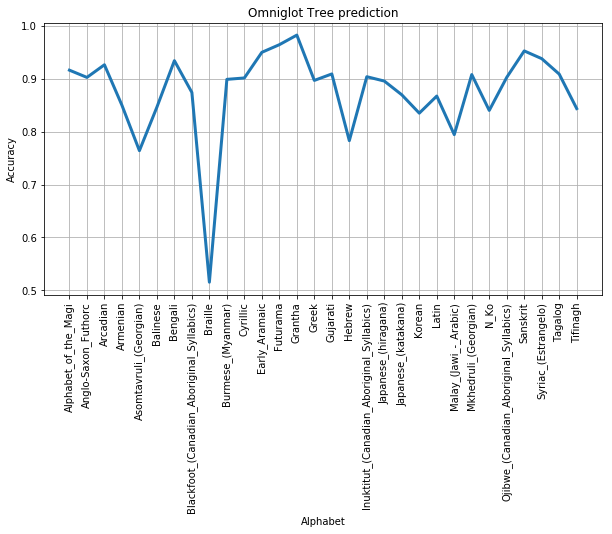

In [23]:
plt.figure(figsize=(10,5))
plt.plot(dataframe.to_numpy()[0], linewidth = 3)
plt.xlabel("Alphabet")
plt.ylabel("Accuracy")
plt.title("Omniglot Tree prediction")
plt.xticks(ticks,list(dataframe.columns),rotation=90)
plt.grid()

In [30]:
#plot to examine data in xtrain 
#plt.figure(figsize = (15,15))
#for i in range(24):    grid = {"n_estimators":np.arange(10,100 , 20)
#          ,"min_samples_leaf":np.arange(10, 50, 5)}
##    plt.subplot(4,8,i+1)
#    plt.axis('off')
#    plt.imshow(Xtrain[i].reshape(105,105))
#    #plt.title(classes[ytrain[i]])
#    plt.title(F_name[i])

In [ ]:
#Dicty = {keys: [] for keys in os.listdir(train_path)}
#score_list = []

In [ ]:
"""
Header = ['Scores']
try:
    with open('scores.csv') as f:
        f.close()
        f = open('scores.csv','a')
        c = csv.writer(f, lineterminator='\n')
        c.writerow(score_list)
        f.close()
except IOError:
    f = open('scores.csv', 'a') # Create file for the first time
    w = csv.writer(f, lineterminator='\n')
    w.writerow(Header)
    w.writerow(score_list)
    f.close()
    
Header2 = ['Alphabet']    
try:
    with open('alpha_name.csv') as f:
        f.close()
        f = open('alpha_name.csv','a')
        c = csv.writer(f, lineterminator='\n')
        c.writerow(Alpha_name)# Append values without header
        f.close()
except IOError:
    f = open('alpha_name.csv', 'a') # Create file for the first time
    w = csv.writer(f, lineterminator='\n')
    w.writerow(Header2)
    w.writerow(Alpha_name)
    f.close()
"""
